Имеется датасет: база данных масштабного опроса об отношении к иммигрантам, проведенного в 6 странах (Германия, Франция, Италия, Швеция, Великобритания и США), в общей сложности включающего 22,500 респондентов.

Единицей наблюдения является индивид. Собиралась информация о социальнодемографическом статусе участников (пол, возраст, занятость, образование…) и их взглядах на иммиграцию. Участникам также задали ряд вопросов, которые касались их представлений о фактах, связанных с эмиграцией, таких как их численность, регион происхождения, религия и уровень образования. Пример вопроса:

1 - Из каждых 100 человек, родившихся в США, сколько в настоящее время безработных? (Безработными мы называем людей, которые в настоящее время не работают, но ищут работу (и, возможно, не могут ее найти))

2 - А теперь сравним это с количеством безработных среди легальных иммигрантов. Из каждых 100 легальных иммигрантов, как вы думаете, сколько в настоящее время безработных?

Данные были дополнены официальными статистическими данными о численности, происхождении, религии, образовании и т. д. иммигрантов



Что нужно сделать.

На основе этих данных нужно построить графики, которые визуализируют ответы на вопросы:

Насколько сильно ответ на вопрос: "Вы считаете, что правительство должно заботиться
только о местных жителях или обо всех? " зависит от пола и занятости респондента?

Как отличаются в зависимости от возраста человека и страны взгляды на ставку налога, которую должен платить 1% самых богатых жителей страны?
Есть ли влияние политических взглядов на отношение к неравенству по доходам как к проблеме и наоборот?


In [1]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_excel('db_hw.xlsx', sheet_name='датасет')

In [3]:
df.columns

Index(['sex', 'age', 'marital_status', 'number_children', 'q_parent_same',
       'employment', 'household_income', 'q_inequality_problem',
       'perc_share_foreign', 'perc_share_ch', 'perc_share_mu',
       'perc_unemp_nat', 'perc_unemp_imm', 'perc_higheduc_nat',
       'perc_higheduc_imm', 'perc_loweduc_nat', 'perc_loweduc_imm',
       'perc_poverty_nat', 'perc_poverty_imm', 'q_imm_problem',
       'q_imm_benefits', 'q_imm_citizenship', 'q_imm_american',
       'transfers_imm', 'tax_top1', 'tax_bottom50', 'country', 'q_govt_imm',
       'lfyyst', 'sector_dummy', 'party_voted', 'perc_share_NA',
       'perc_share_LA', 'perc_share_WE', 'perc_share_EE', 'perc_share_NAF',
       'perc_share_SA', 'perc_share_ME', 'perc_share_A', 'perc_share_O',
       'share_foreign_lc', 'share_Europe_lc', 'share_NorthAmerica_lc',
       'share_LatinAmerica_lc', 'share_Asia_lc', 'share_Africa_lc',
       'college_imm_lc', 'loweduc_imm_lc', 'college_nat_lc', 'loweduc_nat_lc',
       'unemp_imm_lc', 'unem

In [16]:
df.head()

,sex,age,marital_status,number_children,q_parent_same,employment,household_income,q_inequality_problem,perc_share_foreign,perc_share_ch,...,college_nat_lc,loweduc_nat_lc,unemp_imm_lc,unemp_nat_lc,poor_lc,effort_poor,effort_rich,total_donation,respondent_ID,duration
0,1,32,1.0,1.0,1.0,4.0,4.0,4.0,33.0,80.0,...,40.400002,8.9,11.512196,5.479268,19.200001,0.0,1.0,500,1,13.933333
1,1,55,2.0,1.0,1.0,1.0,3.0,4.0,7.0,10.0,...,27.600000,11.4,6.644268,3.446353,18.700001,0.0,1.0,600,2,14.333333
2,1,21,1.0,1.0,1.0,5.0,3.0,5.0,7.0,40.0,...,27.600000,11.4,6.644268,3.446353,18.700001,0.0,1.0,0,3,19.450001
3,2,27,1.0,1.0,1.0,1.0,4.0,4.0,16.0,50.0,...,27.600000,11.4,6.644268,3.446353,18.700001,1.0,1.0,200,4,10.550000
4,1,44,2.0,1.0,1.0,3.0,7.0,4.0,10.0,60.0,...,34.000000,7.9,4.837365,2.302497,12.100000,0.0,1.0,600,5,15.900000


In [4]:
df1 = df[['sex', 'employment', 'q_govt_imm']]

<Axes: >

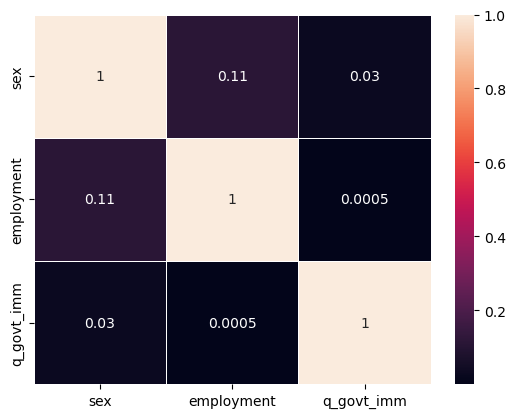

In [5]:
sns.heatmap(df1.corr(), annot=True, linewidths=0.5)

In [8]:
_tdata = df.q_govt_imm.value_counts()

labels = _tdata.index
values = _tdata.values

go.Figure(data=[go.Pie(labels=labels, values=values)])

<Axes: ylabel='Frequency'>

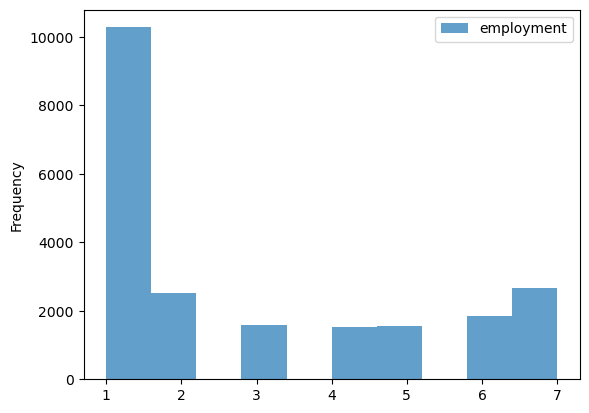

In [7]:
df[[ 'employment']].plot.hist(alpha=0.7, bins=10)

In [9]:
px.pie(df, values="sex", names="q_govt_imm", title="Fare / Pclass")

In [11]:
df1['sex_str'] = np.where(df1['sex']==1, "Male", "Female")

C:\Users\Arseny\AppData\Local\Temp\ipykernel_14932\798968692.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
titanic = sns.load_dataset("titanic")

In [18]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
q =titanic[titanic.deck.notnull()]

In [25]:
q

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


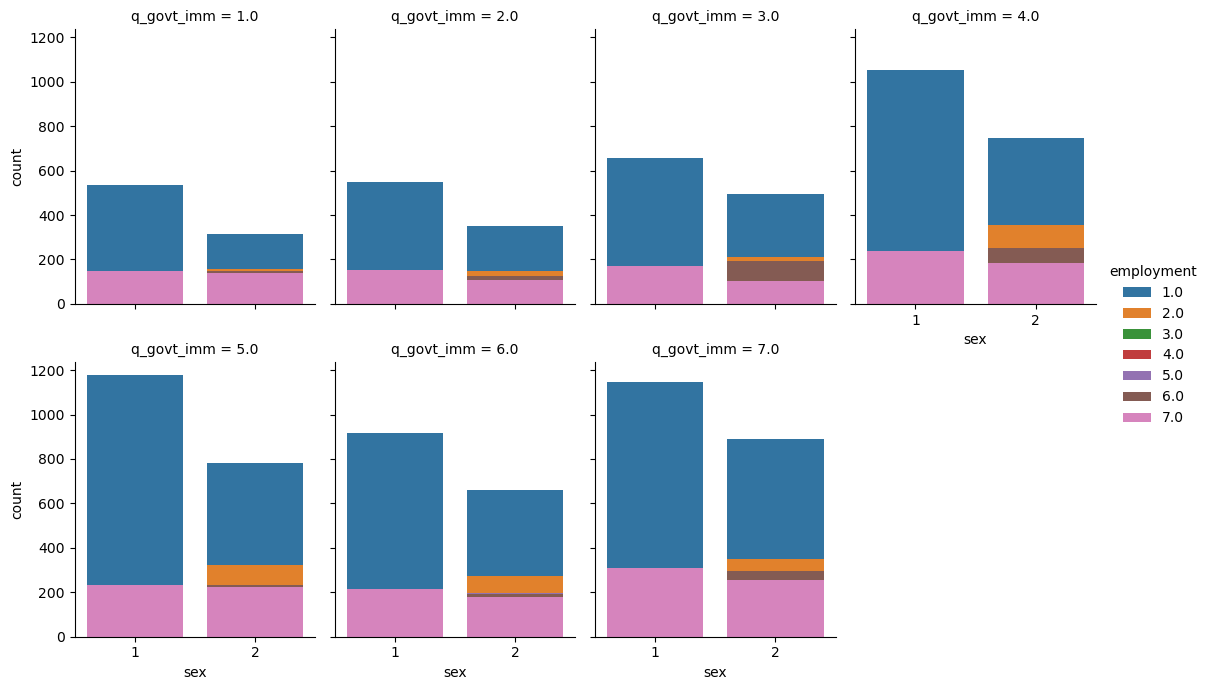

In [66]:
g = sns.catplot(
    data=df, x="sex", col="q_govt_imm",  hue='employment',
    col_wrap=4,  kind="count", height=3.5, aspect=.8,  dodge=False)

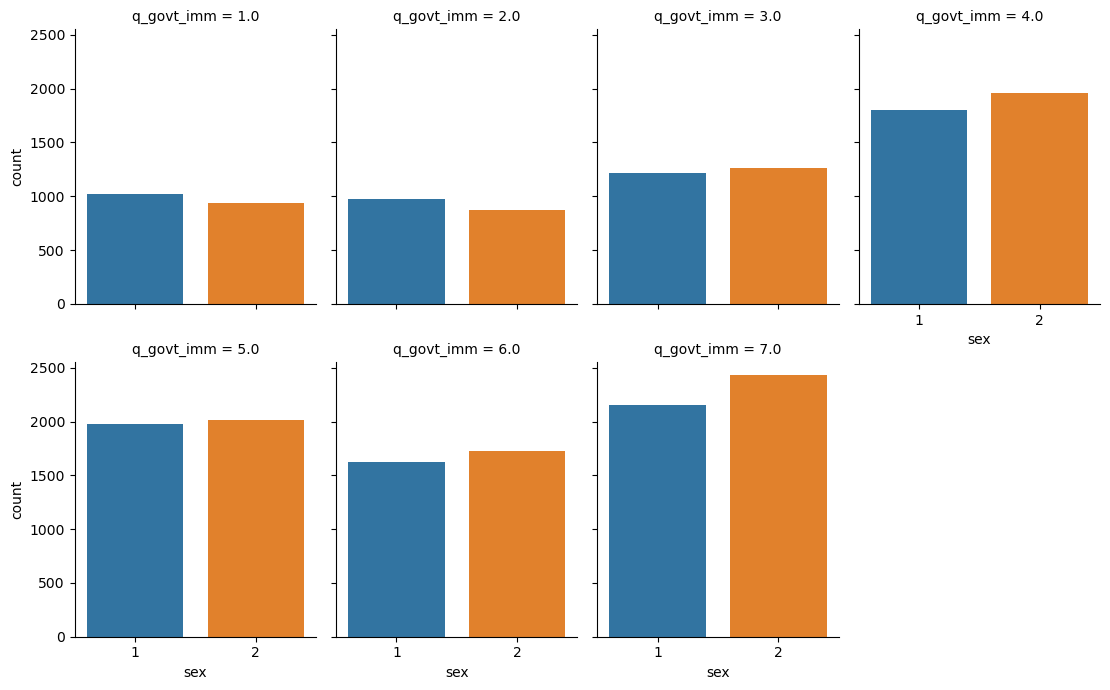

In [44]:
g = sns.catplot(data=df, x="sex", col="q_govt_imm", col_wrap=4,  kind="count", height=3.5, aspect=.8)

In [13]:
df2 = df1[df1['q_govt_imm'] == 1]

In [15]:
px.sunburst(df2.dropna(), path=['sex_str', 'employment',  ])

In [16]:
px.sunburst(df1.dropna(), path=['sex_str', 'employment',  'q_govt_imm',])